[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


3187


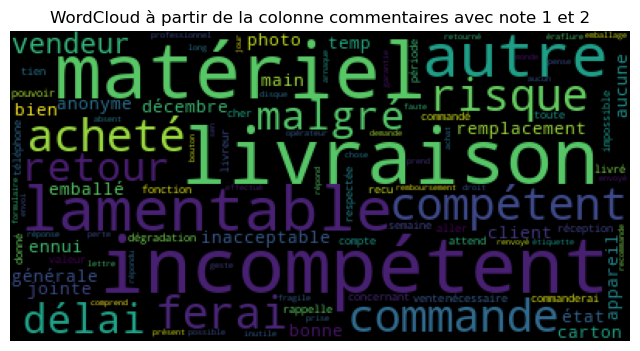

In [1]:
##################################################---WWordCloud et note de satisfaction client ---#################################################################
#
#                                              WordCloud sur les notes de staisfcation client = 1 et 2
#                                              WordCloud sur les notes de satisfaction client= 3
#                                              WordCloud sur les notes de satisfaction client= 4 et 5
#
#################################################################################################################################################################   

# importation 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk

#Téléchargement des ressources NLTK si nécessaire

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer #decoupage en phrase

from nltk.tokenize import word_tokenize #decoupage en mot
from nltk.corpus import stopwords #filtrage stop words
from nltk.tokenize.regexp import RegexpTokenizer #pour détacher "laissez-vous"
from nltk.tokenize import word_tokenize



from sklearn.feature_extraction.text import CountVectorizer  ###CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer ## score TF-IDF 
from nltk.stem.snowball import FrenchStemmer #Normalisation lexicale-La racinisation
from nltk.stem import WordNetLemmatizer # lemmatisation
from wordcloud import WordCloud #nuage de mot

###############################################################################################################################################################################
# _____________________________________________________Traitement des variables texte : commentaires _______________________________________________________________________
#                                                      # Nuage de mots + note de statisfaction client = 1 et 2
################################################################################################################################################################################

#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________
df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

#Note de staisfaction client = 1 et 2
df= df[(df['Note client'] < 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))
# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

#print(tokenized_tfidf)

#################################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec les notes 1 et 2

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et afficher le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 1 et 2" )
plt.show()




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\magal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1302


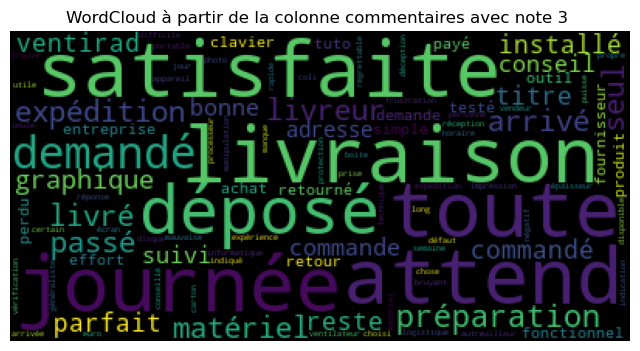

In [2]:
###############################################################################################################################################################################
# __________________________________________ Traitement des variables texte : titre de commentaire et commentaires__________________________________________________________ 
#                                                                # Nuage de mots + note satisfaction = 3
################################################################################################################################################################################
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk

#Téléchargement des ressources NLTK si nécessaire

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer #decoupage en phrase

from nltk.tokenize import word_tokenize #decoupage en mot
from nltk.corpus import stopwords #filtrage stop words
from nltk.tokenize.regexp import RegexpTokenizer #pour détacher "laissez-vous"
from nltk.tokenize import word_tokenize



from sklearn.feature_extraction.text import CountVectorizer  ###CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer ## score TF-IDF 
from nltk.stem.snowball import FrenchStemmer #Normalisation lexicale-La racinisation
from nltk.stem import WordNetLemmatizer # lemmatisation
from wordcloud import WordCloud #nuage de mot
#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________

df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

##Note de satisfaction client = 3
df= df[(df['Note client'] == 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))

# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

#print(tokenized_tfidf)

###################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec la note 3

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et affiche le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 3 ")
plt.show()



29074


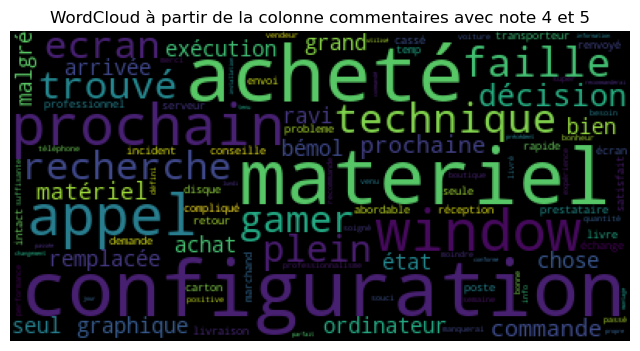

In [3]:
###############################################################################################################################################################################
# _______________________________________________________ Traitement des variables texte :  commentaires ______________________________________________________________________
#                                                        # Nuage de mots + note de satisfaction = 4 et 5
################################################################################################################################################################################

#__________________________________________________________Mise en forme de 2 colonnes__________________________________________________________________________________________

df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')

##Note de satisfaction client = 4 et 5
df= df[(df['Note client'] > 3)]

df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))

# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Applique la tokenisation découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Applique la tokenization découper d'une phrase en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)


# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

#print(tokenized_tfidf)

#################################################################-NUAGE DE MOTS-###########################################################################

# Génére et affiche le nuage de mots de commentaire avec les notes 4 et 5

#transforme en liste
var=' '.join(tokenslemma)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Génére et affiche le nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires avec note 4 et 5" )
plt.show()

